In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [11]:
df_baseline = pd.read_csv("real-noobstacle-Baseline.csv")
df_baseline["Method"] = "Baseline"
df_fscaps = pd.read_csv("real-noobstacle-FSCAPS.csv")
df_fscaps["Method"] = "FSCAPS"
df_obstacle = pd.read_csv("real-obstacle-FSCAPS.csv")
df_obstacle["Method"] = "Obstacle"

In [12]:
def box_plot_steps(data_frames):
    colors = {
        "Baseline": "y",
        "FSCAPS": "m",
        "Obstacle": "c",
    }
    fig, ax = plt.subplots()
    plt.grid(True)
    ax2 = ax.twinx()
    ax.set_ylabel("Steps", weight="bold", color="b")
    ax2.set_ylabel("Seconds", weight="bold", color="r")
    ax.set_title("Episode Length", weight="bold", fontsize=16)
    ax.set_ylim(0, 1300)
    ax2.set_ylim(0, 1300 * 0.016)
    for df in data_frames:
        sns.boxplot(
            data=df,
            x="Method",
            y="Steps",
            ax=ax,
            color=colors[df["Method"].iloc[0]],
        )
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    ax.set_xlabel("")
    plt.show()

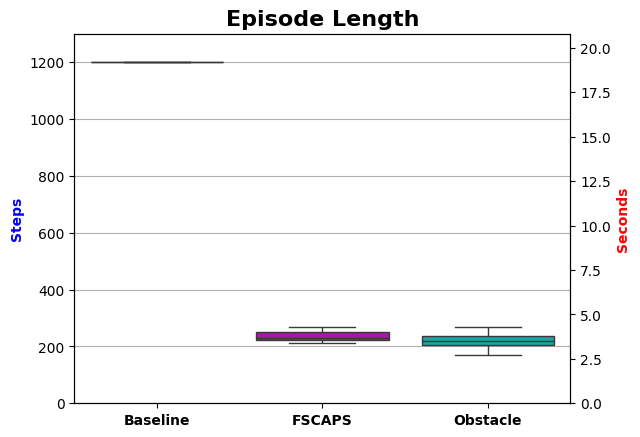

In [13]:
box_plot_steps([df_baseline, df_fscaps, df_obstacle])

In [14]:
def box_plot_cpad(data_frames):
    colors = {
        "Baseline": "y",
        "FSCAPS": "m",
        "Obstacle": "c",
    }
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1))
    fig, ax = plt.subplots()
    ax.set_ylabel("CPAD", weight="bold")
    ax.set_title("Cumulative Pairwise Action Distance", weight="bold", fontsize=16)
    for df in data_frames:
        sns.boxplot(
            data=df,
            x="Method",
            y="CPAD",
            ax=ax,
            color=colors[df["Method"].iloc[0]],
        )
    for label in ax.get_xticklabels():
        label.set_fontweight("bold")
    ax.set_xlabel("")
    fig.gca().xaxis.set_major_formatter(formatter)
    plt.grid(True)
    plt.show()

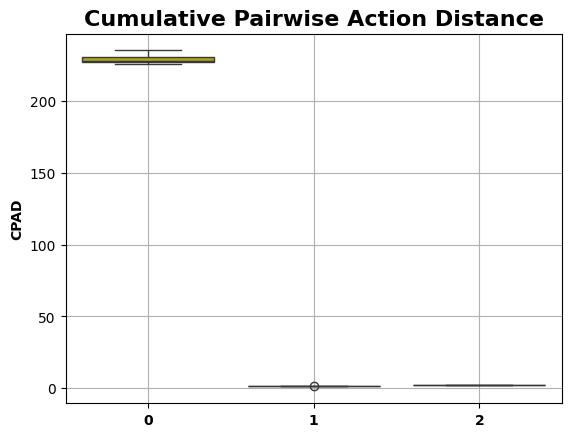

In [15]:
box_plot_cpad([df_baseline, df_fscaps, df_obstacle])

In [17]:
df_gather = pd.concat([df_baseline, df_fscaps, df_obstacle])
grouped_cpad = df_gather.groupby("Method")["CPAD"]
CPAD_iqr = grouped_cpad.quantile([0.25, 0.5, 0.75]).unstack()
CPAD_max_min = grouped_cpad.agg(["max", "min"])
df_cpad = pd.concat([CPAD_iqr, CPAD_max_min], axis=1)
df_cpad

,0.25,0.5,0.75,max,min
Method,,,,,
Baseline,227.065250,227.933500,230.792750,235.06500,225.45400
FSCAPS,1.274737,1.279105,1.344793,1.49107,1.23465
Obstacle,2.043240,2.107170,2.159937,2.32736,2.01431


In [18]:
grouped_steps = df_gather.groupby("Method")["Steps"]
steps_iqr = grouped_steps.quantile([0.25, 0.5, 0.75]).unstack()
steps_max_min = grouped_steps.agg(["max", "min"])
df_steps = pd.concat([steps_iqr, steps_max_min], axis=1)
df_steps

,0.25,0.5,0.75,max,min
Method,,,,,
Baseline,1200.00,1200.0,1200.00,1200,1200
FSCAPS,222.75,229.5,251.75,267,211
Obstacle,205.00,219.5,236.75,268,171
